## importing necessary libraries

In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
### Reading data set

In [3]:
Sales_df = pd.read_excel("Sales.xlsx",sheet_name = 'Sales') 

### Read top 5 records

In [4]:
Sales_df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


### Data type, count, non-null value check

In [5]:
Sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

### Row and column count

In [6]:
Sales_df.shape

(4520, 20)

In [7]:
print('The number of rows (observations) is',Sales_df.shape[0],'\n''The number of columns (variables) is',Sales_df.shape[1])

The number of rows (observations) is 4520 
The number of columns (variables) is 20


### Null value count

In [8]:
Sales_df.isnull().sum().sum()

1166

In [9]:
Sales_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustID,4520.0,NaN,NaN,NaN,7002259.5,1304.955938,7000000.0,7001129.75,7002259.5,7003389.25,7004519.0
AgentBonus,4520.0,NaN,NaN,NaN,4077.838274,1403.321711,1605.0,3027.75,3911.5,4867.25,9608.0
Age,4251.0,NaN,NaN,NaN,14.494707,9.037629,2.0,7.0,13.0,20.0,58.0
CustTenure,4294.0,NaN,NaN,NaN,14.469027,8.963671,2.0,7.0,13.0,20.0,57.0
Channel,4520,3,Agent,3194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,4520,5,Salaried,2192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationField,4520,7,Graduate,1870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4520,3,Male,2688,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ExistingProdType,4520.0,NaN,NaN,NaN,3.688938,1.015769,1.0,3.0,4.0,4.0,6.0
Designation,4520,6,Manager,1620,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Unique value check for Categorical columns

In [10]:
for feature in Sales_df.columns: 
    if Sales_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(Sales_df[feature].unique()))



feature: Channel
['Agent', 'Third Party Partner', 'Online']
Categories (3, object): ['Agent', 'Online', 'Third Party Partner']


feature: Occupation
['Salaried', 'Free Lancer', 'Small Business', 'Laarge Business', 'Large Business']
Categories (5, object): ['Free Lancer', 'Laarge Business', 'Large Business', 'Salaried', 'Small Business']


feature: EducationField
['Graduate', 'Post Graduate', 'UG', 'Under Graduate', 'Engineer', 'Diploma', 'MBA']
Categories (7, object): ['Diploma', 'Engineer', 'Graduate', 'MBA', 'Post Graduate', 'UG', 'Under Graduate']


feature: Gender
['Female', 'Male', 'Fe male']
Categories (3, object): ['Fe male', 'Female', 'Male']


feature: Designation
['Manager', 'Exe', 'Executive', 'VP', 'AVP', 'Senior Manager']
Categories (6, object): ['AVP', 'Exe', 'Executive', 'Manager', 'Senior Manager', 'VP']


feature: MaritalStatus
['Single', 'Divorced', 'Unmarried', 'Married']
Categories (4, object): ['Divorced', 'Married', 'Single', 'Unmarried']


feature: Zone
['North

'Laarge Business' in Occupation, 'UG' in EducationField, 'Fe male' in Gender, 'Exe' in Designation : these are the messy values

## Replaced Messy value with correct one

In [11]:
Sales_df['Occupation'] = Sales_df['Occupation'].str.replace('Laarge Business', 'Large Business')

In [12]:
Sales_df['EducationField'] = Sales_df['EducationField'].str.replace('UG', 'Under Graduate')

In [13]:
Sales_df['Gender'] = Sales_df['Gender'].str.replace('Fe male', 'Female')

In [14]:
Sales_df['Designation'] = Sales_df['Designation'].str.replace('Exe', 'Executive')

In [15]:
Sales_df['Designation'] = Sales_df['Designation'].str.replace('Executivecutive', 'Executive')

In [16]:
for feature in Sales_df.columns: 
    if Sales_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(Sales_df[feature].unique()))



feature: Channel
['Agent', 'Third Party Partner', 'Online']
Categories (3, object): ['Agent', 'Online', 'Third Party Partner']


feature: Occupation
['Salaried', 'Free Lancer', 'Small Business', 'Large Business']
Categories (4, object): ['Free Lancer', 'Large Business', 'Salaried', 'Small Business']


feature: EducationField
['Graduate', 'Post Graduate', 'Under Graduate', 'Engineer', 'Diploma', 'MBA']
Categories (6, object): ['Diploma', 'Engineer', 'Graduate', 'MBA', 'Post Graduate', 'Under Graduate']


feature: Gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']


feature: Designation
['Manager', 'Executive', 'VP', 'AVP', 'Senior Manager']
Categories (5, object): ['AVP', 'Executive', 'Manager', 'Senior Manager', 'VP']


feature: MaritalStatus
['Single', 'Divorced', 'Unmarried', 'Married']
Categories (4, object): ['Divorced', 'Married', 'Single', 'Unmarried']


feature: Zone
['North', 'West', 'East', 'South']
Categories (4, object): ['East', 'North', 'South', 'West']

## Convert the data set into excel for visualisation in Tableau

In [17]:
Sales_df.to_excel("Sales_new.xlsx")

In [18]:
Sales_df.describe()

,CustID,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore
count,4.520000e+03,4520.000000,4251.000000,4294.000000,4520.000000,4475.000000,4284.000000,4520.000000,4336.000000,4.366000e+03,4520.000000,4468.000000
mean,7.002260e+06,4077.838274,14.494707,14.469027,3.688938,3.565363,22890.309991,0.287168,4.130074,6.199997e+05,4.626991,3.067592
std,1.304956e+03,1403.321711,9.037629,8.963671,1.015769,1.455926,4885.600757,0.452491,3.346386,2.462348e+05,3.620132,1.382968
min,7.000000e+06,1605.000000,2.000000,2.000000,1.000000,1.000000,16009.000000,0.000000,1.000000,1.685360e+05,0.000000,1.000000
25%,7.001130e+06,3027.750000,7.000000,7.000000,3.000000,2.000000,19683.500000,0.000000,2.000000,4.394432e+05,2.000000,2.000000
50%,7.002260e+06,3911.500000,13.000000,13.000000,4.000000,4.000000,21606.000000,0.000000,3.000000,5.789765e+05,3.000000,3.000000
75%,7.003389e+06,4867.250000,20.000000,20.000000,4.000000,5.000000,24725.000000,1.000000,6.000000,7.582360e+05,8.000000,4.000000
max,7.004519e+06,9608.000000,58.000000,57.000000,6.000000,6.000000,38456.000000,1.000000,25.000000,1.838496e+06,18.000000,5.000000


In [19]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

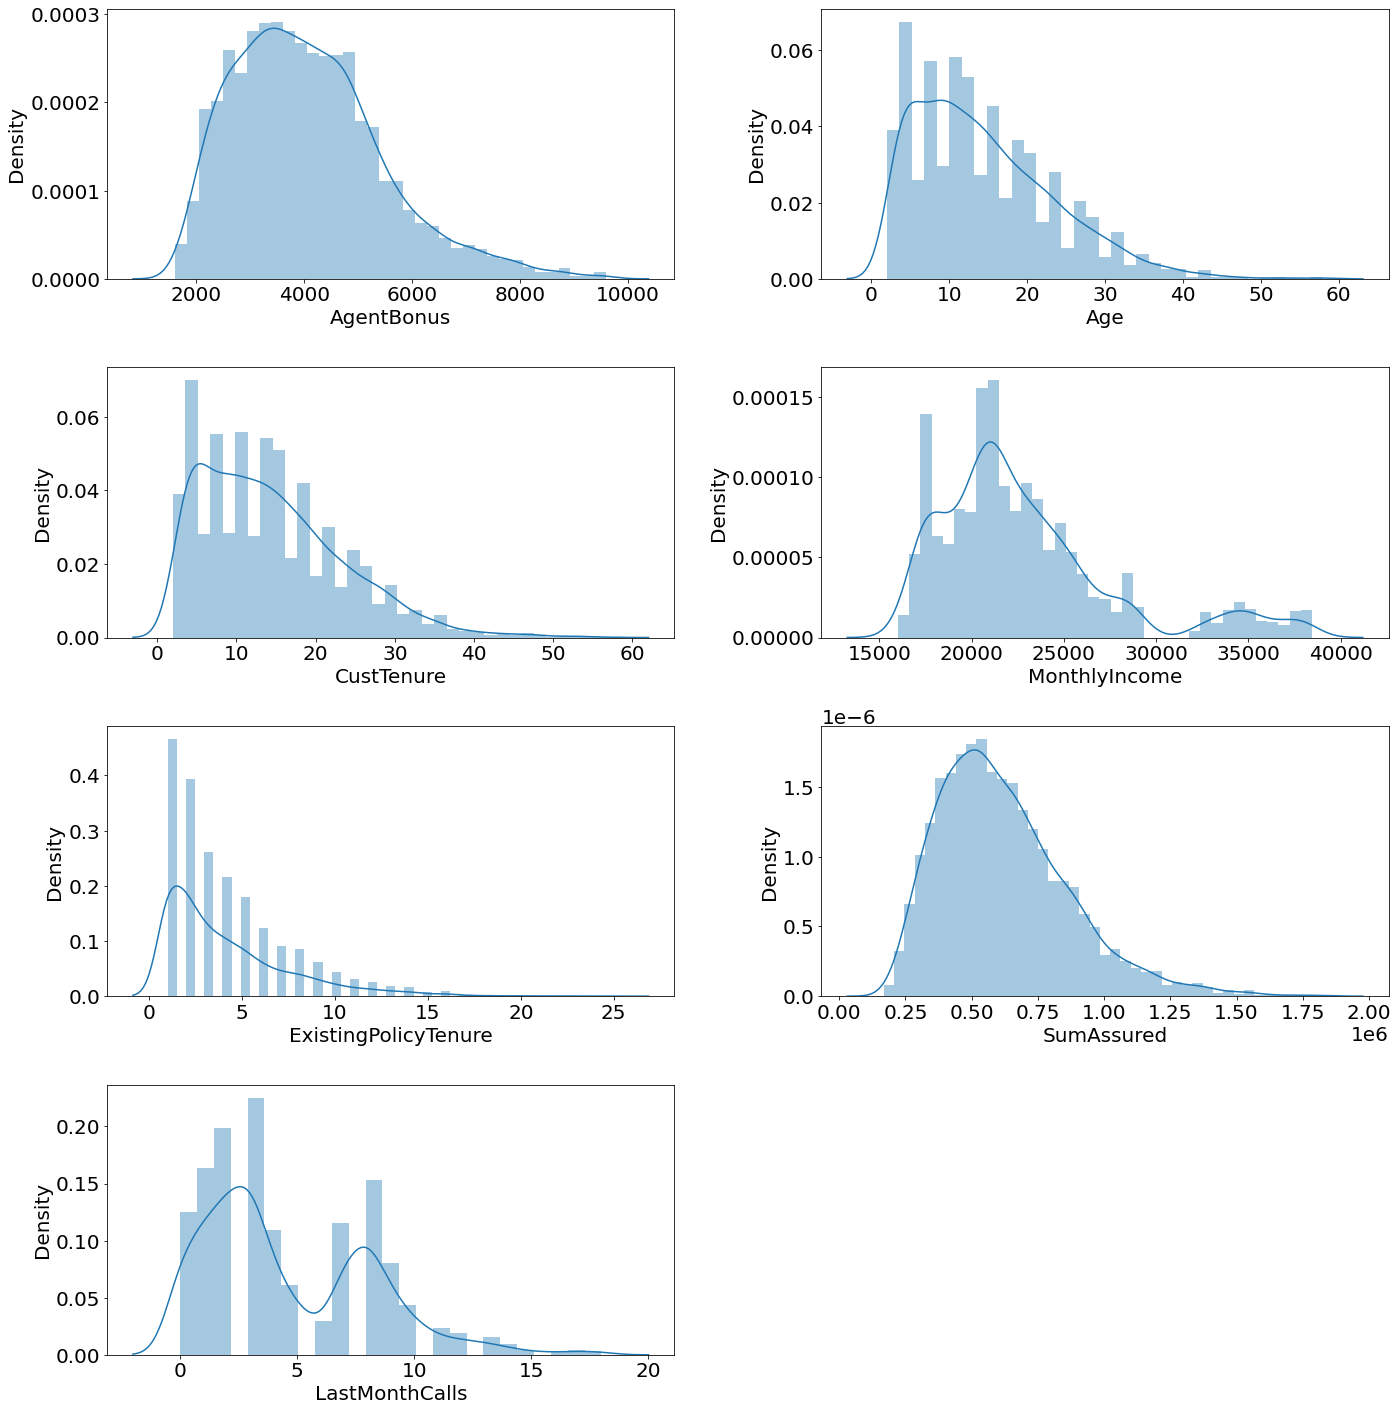

In [200]:
data_dist=Sales_df[['AgentBonus', 'Age','CustTenure','MonthlyIncome','ExistingPolicyTenure','SumAssured','LastMonthCalls']]
plt.rcParams.update({'font.size': 20})
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_dist.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.distplot(data_dist[data_dist.columns[i]])
    plt.tight_layout()

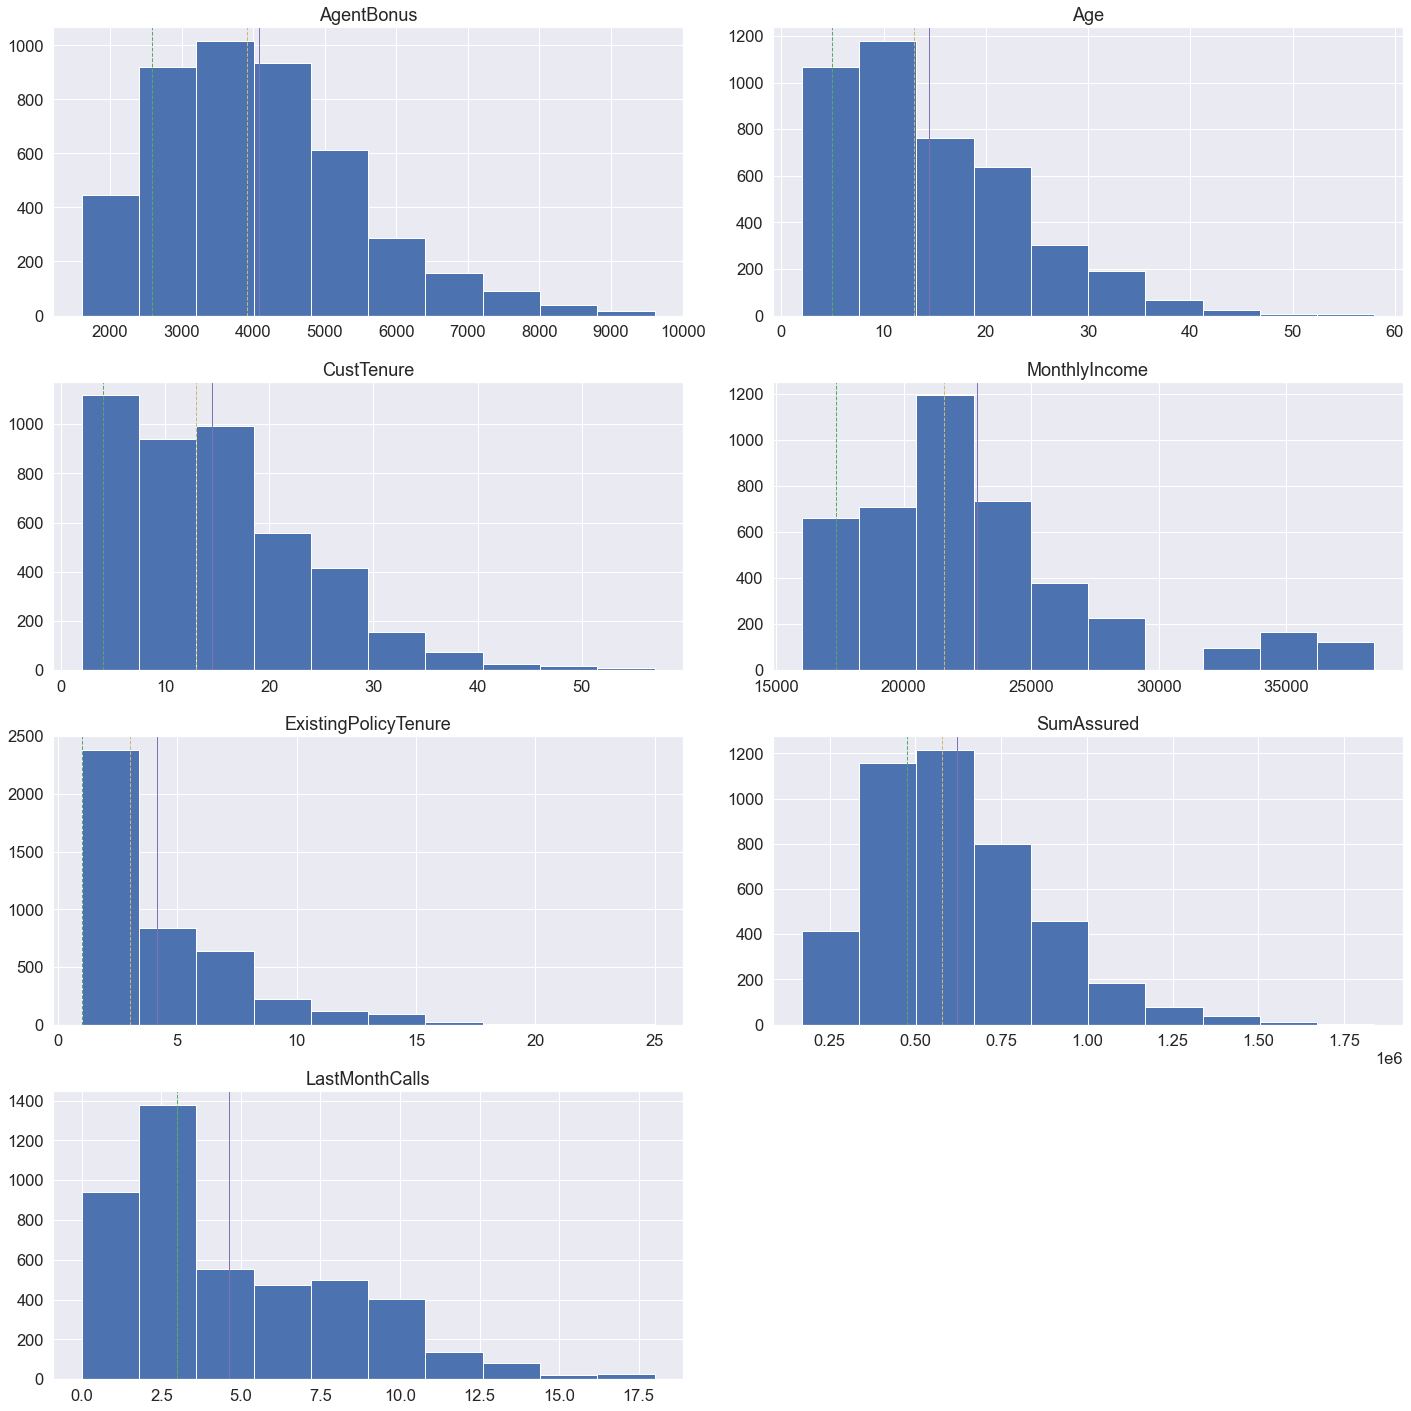

In [204]:
data_hist=Sales_df[['AgentBonus', 'Age','CustTenure','MonthlyIncome','ExistingPolicyTenure','SumAssured','LastMonthCalls']]
t = ['AgentBonus', 'Age','CustTenure','MonthlyIncome','ExistingPolicyTenure','SumAssured','LastMonthCalls']
plt.rcParams.update({'font.size': 20})
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_hist.columns)):
    ax=fig.add_subplot(4,2,i+1)
    data_hist[data_hist.columns[i]].hist()
    plt.axvline(data_hist[data_hist.columns[i]].mean(), color='m', linewidth=1)
    plt.axvline(data_hist[data_hist.columns[i]].median(), color='y', linestyle='dashed', linewidth=1)
    plt.axvline(data_hist[data_hist.columns[i]].mode()[0], color='g', linestyle='dashed', linewidth=1)
    plt.title(t[i])
    plt.tight_layout()

Shape before Outliers Treatment (4520, 19)


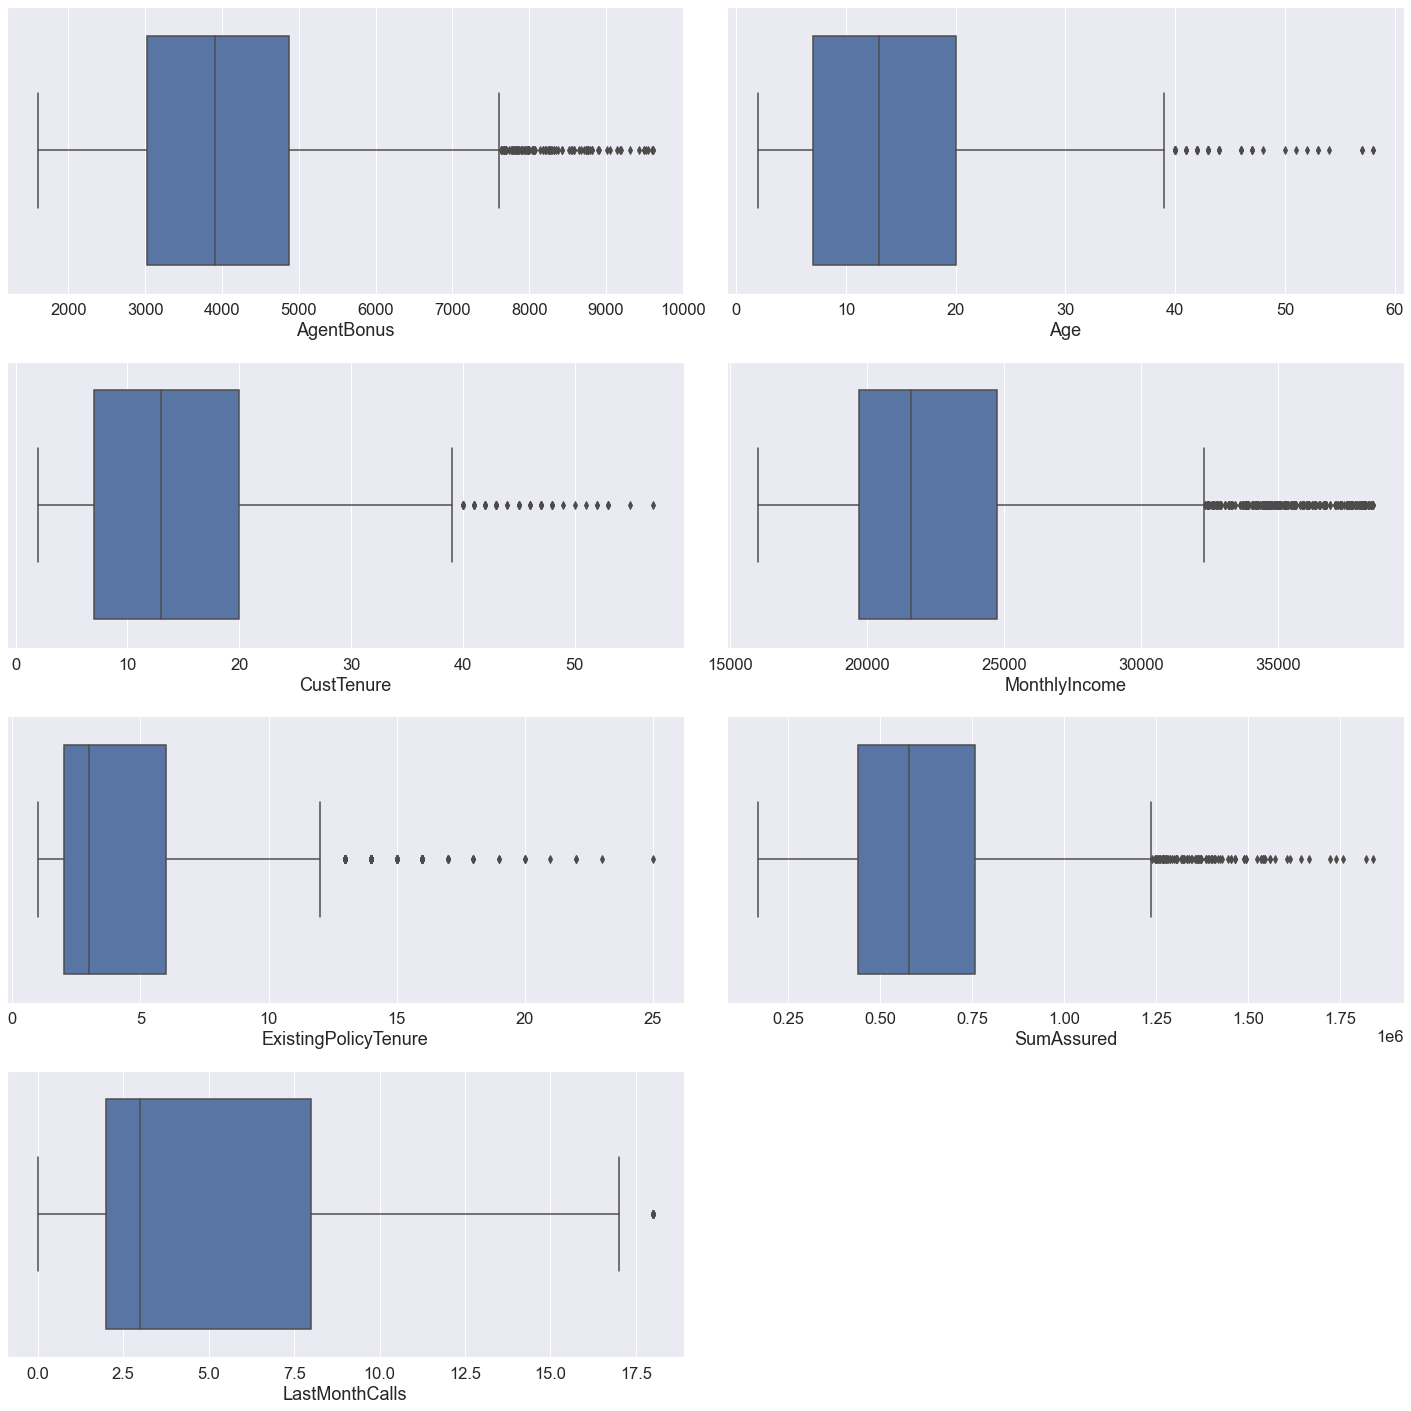

In [205]:
data_outlier=Sales_df[['AgentBonus', 'Age','CustTenure','MonthlyIncome','ExistingPolicyTenure','SumAssured','LastMonthCalls']]
fig=plt.figure(figsize=(20,20))
plt.rcParams.update({'font.size': 20})
for i in range(0,len(data_outlier.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.boxplot(data_outlier[data_outlier.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',Sales_df.shape)

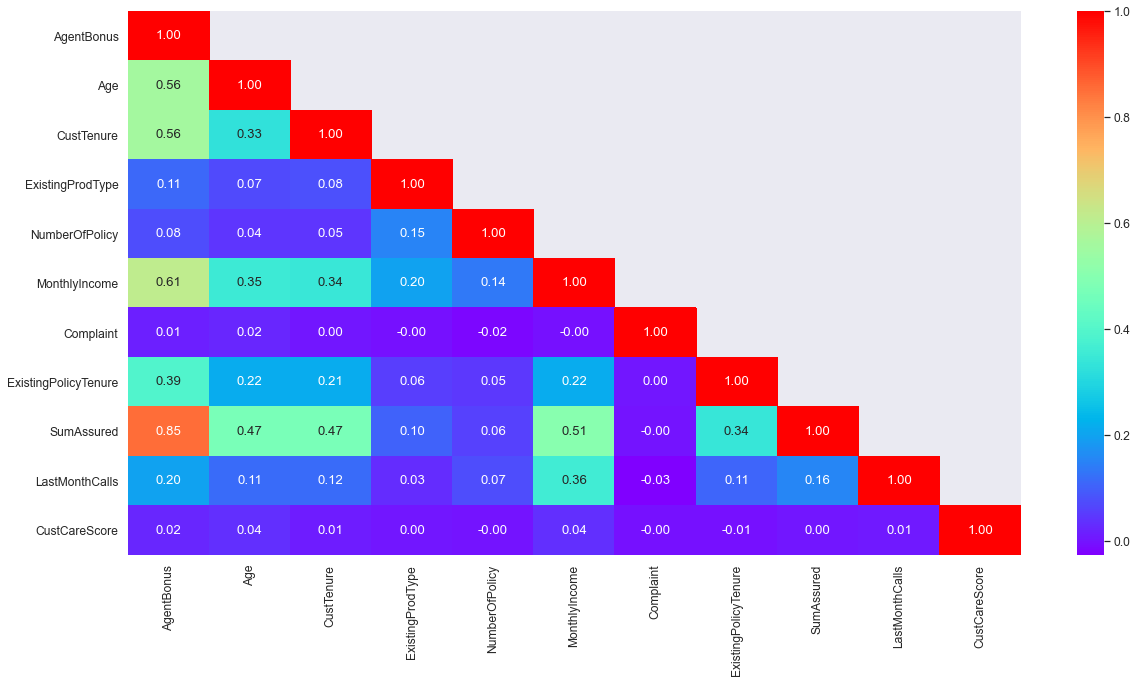

In [214]:
sns.set(font_scale=1.1)
plt.figure(figsize=(20,10))
sns.heatmap(Sales_df.corr(),annot = True,fmt = '.2f',cmap='rainbow',mask=np.triu(Sales_df.corr(),+1));

<AxesSubplot:xlabel='Channel', ylabel='count'>

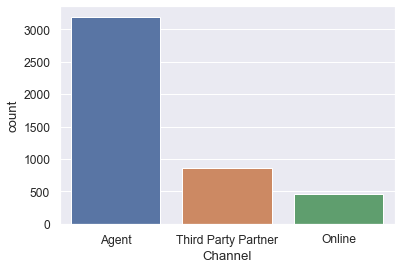

In [229]:
sns.countplot(x = 'Channel',data = Sales_df)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

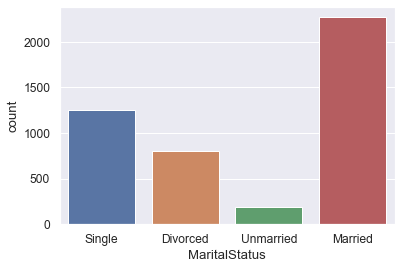

In [230]:
sns.countplot(x = 'MaritalStatus',data = Sales_df)

<AxesSubplot:xlabel='Designation', ylabel='count'>

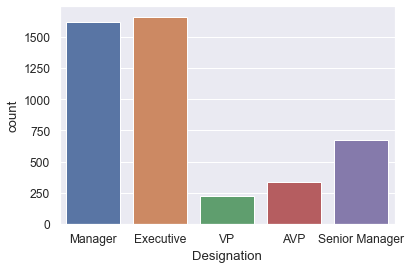

In [216]:
sns.countplot(x = 'Designation',data = Sales_df)

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

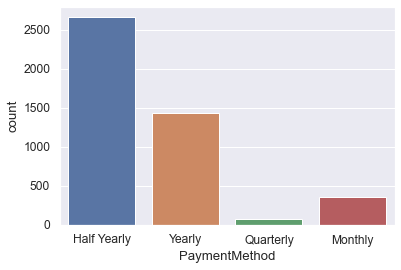

In [217]:
sns.countplot(x = 'PaymentMethod',data = Sales_df)

<AxesSubplot:xlabel='EducationField', ylabel='count'>

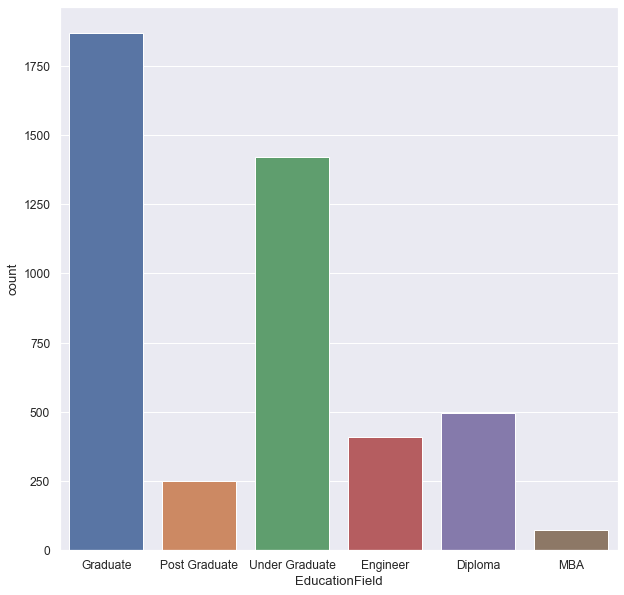

In [233]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'EducationField',data = Sales_df)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

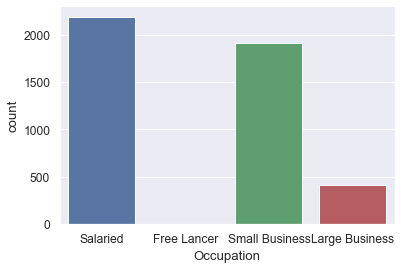

In [218]:
sns.countplot(x = 'Occupation',data = Sales_df)

## Unique value count for Categorical column

In [24]:
Sales_df_original = Sales_df.copy()

In [25]:
for column in Sales_df.columns:
    if Sales_df[column].dtype == 'object':
        print(column.upper(),': ',Sales_df[column].nunique())
        print(Sales_df[column].value_counts().sort_values())
        print('\n')

CHANNEL :  3
Online                  468
Third Party Partner     858
Agent                  3194
Name: Channel, dtype: int64


OCCUPATION :  4
Free Lancer          2
Large Business     408
Small Business    1918
Salaried          2192
Name: Occupation, dtype: int64


EDUCATIONFIELD :  6
MBA                 74
Post Graduate      252
Engineer           408
Diploma            496
Under Graduate    1420
Graduate          1870
Name: EducationField, dtype: int64


GENDER :  2
Female    1832
Male      2688
Name: Gender, dtype: int64


DESIGNATION :  5
VP                 226
AVP                336
Senior Manager     676
Manager           1620
Executive         1662
Name: Designation, dtype: int64


MARITALSTATUS :  4
Unmarried     194
Divorced      804
Single       1254
Married      2268
Name: MaritalStatus, dtype: int64


ZONE :  4
South       6
East       64
North    1884
West     2566
Name: Zone, dtype: int64


PAYMENTMETHOD :  4
Quarterly        76
Monthly         354
Yearly         1434
H

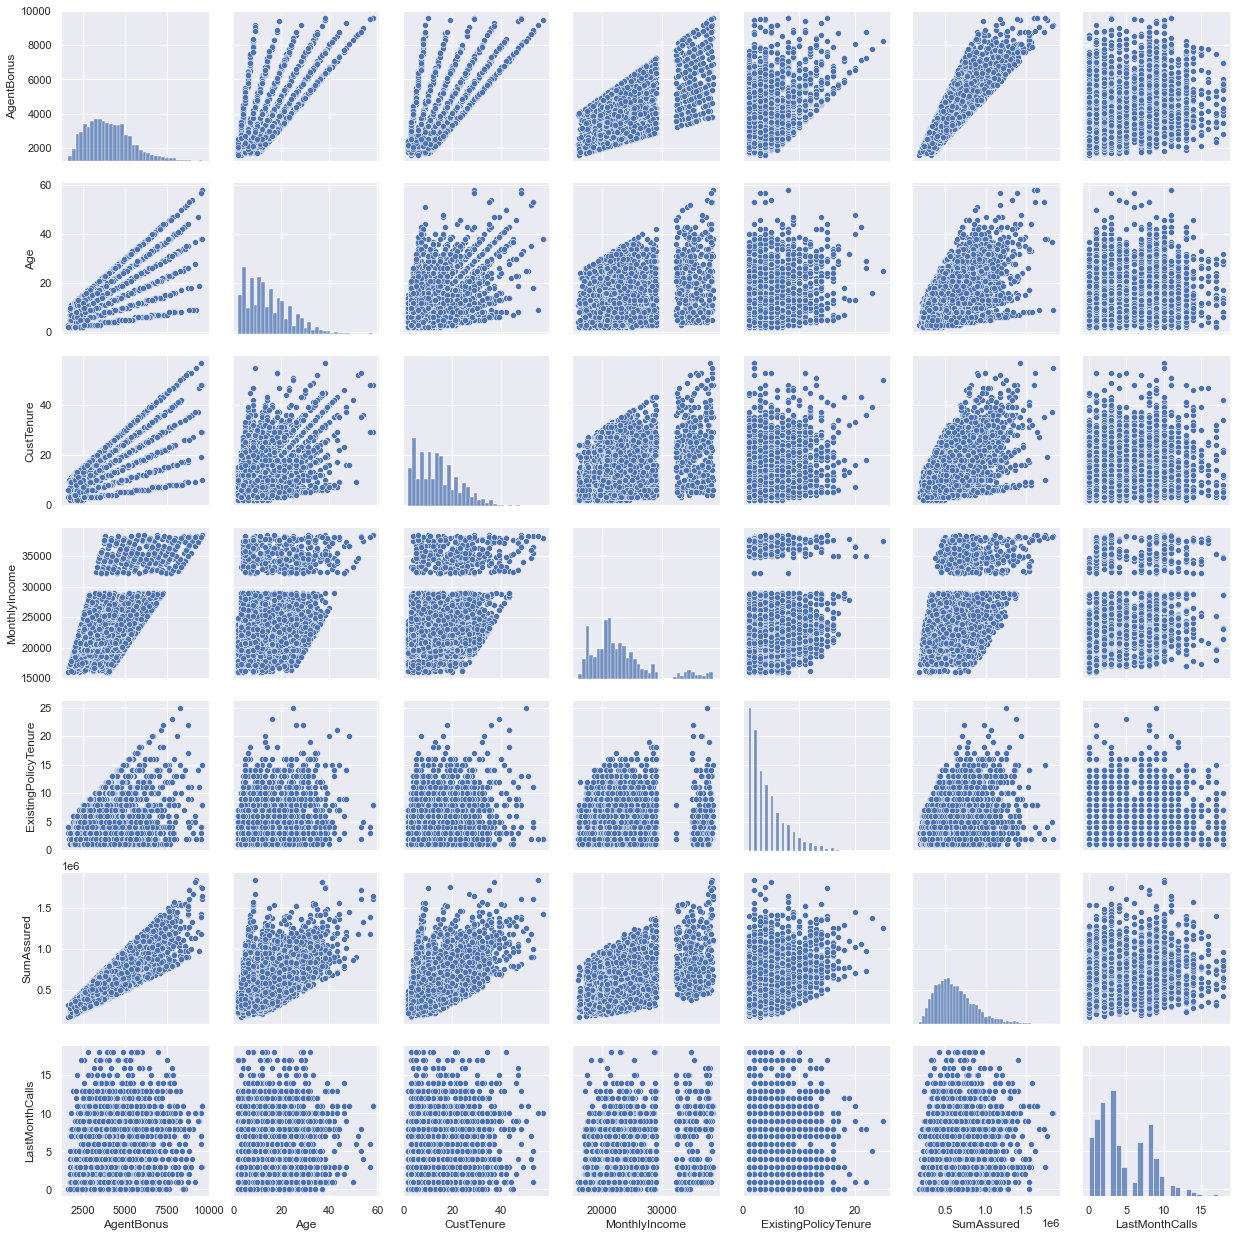

In [210]:
sns.set(font_scale=1)
sns.pairplot(Sales_df[['AgentBonus', 'Age','CustTenure','MonthlyIncome','ExistingPolicyTenure','SumAssured','LastMonthCalls']])

## Null Value and Outlier treatment

In [27]:
Sales_df.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

There is no null value in Target column. But Outlier present in Target column. We will not treat outlier value for target column as this will lead to data loss. 
We will treat Null value and outlier for other column using KNN Imputer.
CustID column is not a such important column here. We will drop it.
Then we will seperate Target column from data set for Null value and outlier treatment.

In [28]:
Sales_df = Sales_df.drop(['CustID'], axis = 1)

In [29]:
Sales_df_X = Sales_df.drop('AgentBonus', axis = 1)
Sales_df_Y = Sales_df['AgentBonus']

In [30]:
Sales_df_X.shape

(4520, 18)

## Check the number of outliers per column

In [31]:
Q1 = Sales_df_X.quantile(0.25)
Q3 = Sales_df_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [32]:
((Sales_df_X > UL) | (Sales_df_X < LL)).sum()

Age                      50
Channel                   0
Complaint                 0
CustCareScore             0
CustTenure               52
Designation               0
EducationField            0
ExistingPolicyTenure    131
ExistingProdType        306
Gender                    0
LastMonthCalls           12
MaritalStatus             0
MonthlyIncome           377
NumberOfPolicy            0
Occupation                0
PaymentMethod             0
SumAssured               96
Zone                      0
dtype: int64

### Converting all outlier value into Null value before imputation

In [33]:
Sales_df_X[((Sales_df_X > UL) | (Sales_df_X < LL))]= np.nan

In [34]:
Sales_df_X.isnull().sum()

Age                     319
CustTenure              278
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType        306
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           613
Complaint                 0
ExistingPolicyTenure    315
SumAssured              250
Zone                      0
PaymentMethod             0
LastMonthCalls           12
CustCareScore            52
dtype: int64

In [35]:
Sales_df_X.isnull().sum().sum()

2190

### Calculate percentage of null value by each column

In [36]:
Sales_df_X.isnull().sum().sort_values(ascending = False)/Sales_df_X.index.size

MonthlyIncome           0.135619
Age                     0.070575
ExistingPolicyTenure    0.069690
ExistingProdType        0.067699
CustTenure              0.061504
SumAssured              0.055310
CustCareScore           0.011504
NumberOfPolicy          0.009956
LastMonthCalls          0.002655
Designation             0.000000
Gender                  0.000000
EducationField          0.000000
Complaint               0.000000
Occupation              0.000000
Channel                 0.000000
Zone                    0.000000
PaymentMethod           0.000000
MaritalStatus           0.000000
dtype: float64

## Encoding Categorical Variable

In [37]:
for feature in Sales_df_X.columns: 
    if Sales_df_X[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(Sales_df_X[feature].unique()))
        print(pd.Categorical(Sales_df_X[feature].unique()).codes)
        Sales_df_X[feature] = pd.Categorical(Sales_df_X[feature]).codes



feature: Channel
['Agent', 'Third Party Partner', 'Online']
Categories (3, object): ['Agent', 'Online', 'Third Party Partner']
[0 2 1]


feature: Occupation
['Salaried', 'Free Lancer', 'Small Business', 'Large Business']
Categories (4, object): ['Free Lancer', 'Large Business', 'Salaried', 'Small Business']
[2 0 3 1]


feature: EducationField
['Graduate', 'Post Graduate', 'Under Graduate', 'Engineer', 'Diploma', 'MBA']
Categories (6, object): ['Diploma', 'Engineer', 'Graduate', 'MBA', 'Post Graduate', 'Under Graduate']
[2 4 5 1 0 3]


feature: Gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
[0 1]


feature: Designation
['Manager', 'Executive', 'VP', 'AVP', 'Senior Manager']
Categories (5, object): ['AVP', 'Executive', 'Manager', 'Senior Manager', 'VP']
[2 1 4 0 3]


feature: MaritalStatus
['Single', 'Divorced', 'Unmarried', 'Married']
Categories (4, object): ['Divorced', 'Married', 'Single', 'Unmarried']
[2 0 3 1]


feature: Zone
['North', 'West', 'East', 'South'

In [38]:
Sales_df_X.head()

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,22.0,4.0,0,2,2,0,3.0,2,2.0,2,20993.0,1,2.0,806761.0,1,0,5.0,2.0
1,11.0,2.0,2,2,2,1,4.0,2,4.0,0,20130.0,0,3.0,294502.0,1,3,7.0,3.0
2,26.0,4.0,0,0,4,1,4.0,1,3.0,3,17090.0,1,2.0,NaN,1,3,0.0,3.0
3,11.0,NaN,2,2,2,0,3.0,1,3.0,0,17909.0,1,2.0,268635.0,3,0,0.0,5.0
4,6.0,NaN,0,3,5,1,3.0,1,4.0,0,18468.0,0,4.0,366405.0,3,0,2.0,5.0


#### Scale the predictors 

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [41]:
scaled_features = Sales_df_X.copy()

col_names = ['Age','CustTenure','MonthlyIncome','ExistingPolicyTenure','SumAssured','LastMonthCalls']
features = scaled_features[col_names]

# Use scaler of choice; here Standard scaler is used
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features

In [42]:
Scales_new = pd.concat([scaled_features, Sales_df_Y], axis = 1)

In [43]:
Scales_new.head()

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,AgentBonus
0,0.933640,-1.212620,0,2,2,0,3.0,2,2.0,2,-0.226325,1,-0.649070,0.936419,1,0,0.114839,2.0,4409
1,-0.371434,-1.452974,2,2,2,1,4.0,2,4.0,0,-0.506237,0,-0.287184,-1.411660,1,3,0.676938,3.0,2214
2,1.408213,-1.212620,0,0,4,1,4.0,1,3.0,3,-1.492252,1,-0.649070,NaN,1,3,-1.290409,3.0,4273
3,-0.371434,NaN,2,2,2,0,3.0,1,3.0,0,-1.226612,1,-0.649070,-1.530228,3,0,-1.290409,5.0,1791
4,-0.964650,NaN,0,3,5,1,3.0,1,4.0,0,-1.045302,0,0.074701,-1.082073,3,0,-0.728310,5.0,2955


## Imputing the missing values

In [44]:
from sklearn.impute import KNNImputer

In [45]:
imputer = KNNImputer(n_neighbors=10)

In [46]:
Sales_imputed = pd.DataFrame(imputer.fit_transform(Scales_new),columns =Scales_new.columns)

In [47]:
Sales_imputed.head()

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,AgentBonus
0,0.933640,-1.212620,0.0,2.0,2.0,0.0,3.0,2.0,2.0,2.0,-0.226325,1.0,-0.649070,0.936419,1.0,0.0,0.114839,2.0,4409.0
1,-0.371434,-1.452974,2.0,2.0,2.0,1.0,4.0,2.0,4.0,0.0,-0.506237,0.0,-0.287184,-1.411660,1.0,3.0,0.676938,3.0,2214.0
2,1.408213,-1.212620,0.0,0.0,4.0,1.0,4.0,1.0,3.0,3.0,-1.492252,1.0,-0.649070,0.163053,1.0,3.0,-1.290409,3.0,4273.0
3,-0.371434,-1.020337,2.0,2.0,2.0,0.0,3.0,1.0,3.0,0.0,-1.226612,1.0,-0.649070,-1.530228,3.0,0.0,-1.290409,5.0,1791.0
4,-0.964650,-0.575682,0.0,3.0,5.0,1.0,3.0,1.0,4.0,0.0,-1.045302,0.0,0.074701,-1.082073,3.0,0.0,-0.728310,5.0,2955.0


In [48]:
Sales_imputed.isnull().sum().sum()

0

## KMeans Clustering

In [49]:
from sklearn.cluster import KMeans

In [50]:
Sales_predictors = Sales_imputed.drop('AgentBonus', axis = 1)
Sales_target = Sales_imputed['AgentBonus']

In [51]:
k_means = KMeans(n_clusters = 2)

In [52]:
k_means.fit(Sales_predictors)

KMeans(n_clusters=2)

In [53]:
k_means.labels_

array([0, 0, 1, ..., 0, 0, 1])

In [54]:
k_means.inertia_

76392.62783350202

In [55]:
k_means = KMeans(n_clusters = 3)
k_means.fit(Sales_predictors)
k_means.inertia_

70664.581454134

In [56]:
k_means = KMeans(n_clusters = 4)
k_means.fit(Sales_predictors)
k_means.inertia_

66743.7474707698

In [57]:
k_means = KMeans(n_clusters = 5)
k_means.fit(Sales_predictors)
k_means.inertia_

63588.35390251812

In [58]:
k_means = KMeans(n_clusters = 6)
k_means.fit(Sales_predictors)
k_means.inertia_

61073.72108416208

In [59]:
wss =[] 

In [60]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(Sales_predictors)
    wss.append(KM.inertia_)

In [61]:
wss

[88651.76652805597,
 76392.62783350202,
 70664.581454134,
 66745.77411115084,
 63922.93008838528,
 61074.72660512747,
 59132.189552737975,
 57586.59127117595,
 56234.78904414376,
 55173.933129938756]

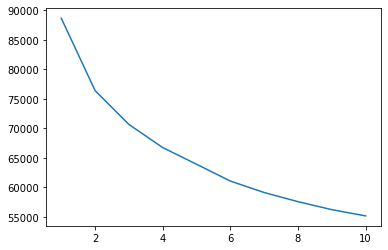

In [62]:
plt.plot(range(1,11), wss)

In [63]:
k_means = KMeans(n_clusters = 3)
k_means.fit(Sales_predictors)
labels = k_means.labels_

In [64]:
Sales_df_original["Clus_kmeans"] = labels
Sales_df_original.head(5)

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,Clus_kmeans
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0,0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0,2
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Executive,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0,2
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Female,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0,0
4,7000004,2955,6.0,NaN,Agent,Small Business,Under Graduate,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0,1


### calculate silhouette_score

In [65]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [66]:
silhouette_score(Sales_predictors,labels)

0.12556470181032947

In [67]:
sil_width = silhouette_samples(Sales_predictors,labels)

In [68]:
Sales_df_original["sil_width"] = sil_width
Sales_df_original.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,Clus_kmeans,sil_width
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0,0,0.162795
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0,2,0.122972
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Executive,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0,2,0.038463
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Female,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0,0,0.140510
4,7000004,2955,6.0,NaN,Agent,Small Business,Under Graduate,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0,1,0.155763


## Cluster Profiling

In [69]:
Sales_df_original.Clus_kmeans.value_counts().sort_index()

0    1916
1    1621
2     983
Name: Clus_kmeans, dtype: int64

In [70]:
clust_profile=Sales_df_original.groupby('Clus_kmeans').mean()
clust_profile['freq']=Sales_df_original.Clus_kmeans.value_counts().sort_index()
clust_profile

,CustID,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,sil_width,freq
Clus_kmeans,,,,,,,,,,,,,,
0,7.002246e+06,4065.682672,14.292035,14.343143,3.275052,3.538745,22849.459934,0.287578,4.251360,617612.215676,4.724948,3.118456,0.132560,1916
1,7.002241e+06,4061.855028,14.452208,14.399225,3.634176,3.584529,22797.907022,0.286860,3.961290,619543.511836,4.492906,3.023111,0.122977,1621
2,7.002317e+06,4127.888098,14.960043,14.823280,4.585961,3.585641,23124.665584,0.286877,4.170886,625382.559286,4.657172,3.042008,0.116197,983


## Model Bulding

In [71]:
Sales_imputed.head()

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,AgentBonus
0,0.933640,-1.212620,0.0,2.0,2.0,0.0,3.0,2.0,2.0,2.0,-0.226325,1.0,-0.649070,0.936419,1.0,0.0,0.114839,2.0,4409.0
1,-0.371434,-1.452974,2.0,2.0,2.0,1.0,4.0,2.0,4.0,0.0,-0.506237,0.0,-0.287184,-1.411660,1.0,3.0,0.676938,3.0,2214.0
2,1.408213,-1.212620,0.0,0.0,4.0,1.0,4.0,1.0,3.0,3.0,-1.492252,1.0,-0.649070,0.163053,1.0,3.0,-1.290409,3.0,4273.0
3,-0.371434,-1.020337,2.0,2.0,2.0,0.0,3.0,1.0,3.0,0.0,-1.226612,1.0,-0.649070,-1.530228,3.0,0.0,-1.290409,5.0,1791.0
4,-0.964650,-0.575682,0.0,3.0,5.0,1.0,3.0,1.0,4.0,0.0,-1.045302,0.0,0.074701,-1.082073,3.0,0.0,-0.728310,5.0,2955.0


### Train Test Split

In [72]:
# Copy all the predictor variables into X dataframe
X = Sales_imputed.drop('AgentBonus', axis=1)

# Copy target into the y dataframe. 
y = Sales_imputed[['AgentBonus']]

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# <span style="color:Blue">Model 1 : Linear Regression Model on imputed scaled data </span>

In [74]:
regression_model = LinearRegression()

In [75]:
regression_model.fit(X_train, y_train)

LinearRegression()

In [76]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Age is 174.51241388441272
The coefficient for CustTenure is 183.5596425406521
The coefficient for Channel is -3.3024505427724935
The coefficient for Occupation is -12.54709701078859
The coefficient for EducationField is 11.316072898552694
The coefficient for Gender is 39.27031716410371
The coefficient for ExistingProdType is -68.9252695796532
The coefficient for Designation is -40.959545904868484
The coefficient for NumberOfPolicy is -3.6341589959303287
The coefficient for MaritalStatus is 2.6981162158173055
The coefficient for MonthlyIncome is 338.592790818322
The coefficient for Complaint is 14.166715036197047
The coefficient for ExistingPolicyTenure is 106.02111622032653
The coefficient for SumAssured is 796.980106942751
The coefficient for Zone is 6.0470127849806845
The coefficient for PaymentMethod is 9.888406832506579
The coefficient for LastMonthCalls is -8.51034006556222
The coefficient for CustCareScore is 15.981458049827568


In [77]:
# Let us check the intercept for the model
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 4252.783141972408


## R square on training data

In [78]:
# R square on training data
LR_R2_Train = regression_model.score(X_train, y_train)
LR_R2_Train

0.7967705084223219

## R square on testing data

In [79]:
# R square on testing data
LR_R2_Test = regression_model.score(X_test, y_test)
LR_R2_Test

0.7768542973652236

## RMSE on Training data

In [80]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
LR_RMSE_Train = np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
LR_RMSE_Train

633.6993082136185

## RMSE on Testing data

In [81]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
LR_RMSE_Test = np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
LR_RMSE_Test

660.0120383393723

## Adjusted R square Train data

In [82]:
LR_AdjR2_Train = 1 - (1-regression_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
LR_AdjR2_Train

0.7956073507598741

## Adjusted R square Test data

In [83]:
LR_AdjR2_Test = 1 - (1-regression_model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
LR_AdjR2_Test

0.773850091944561

## MAPE Train Data

In [84]:
from sklearn.metrics import mean_absolute_percentage_error

In [85]:
LR_MAPE_Train = mean_absolute_percentage_error(y_train,predicted_train)
LR_MAPE_Train

0.12454125471689212

## MAPE Test Data

In [86]:
LR_MAPE_Test = mean_absolute_percentage_error(y_test,predicted_test)
LR_MAPE_Test

0.13035849993986645

In [87]:
resultsDf = pd.DataFrame({'R_sqr_Train': [LR_R2_Train], 
                            'R_sqr_Test': [LR_R2_Test],
                            'Adj_R_sqr_Train': [LR_AdjR2_Train],
                            'Adj_R_sqr_Test': [LR_AdjR2_Test],
                            'RMSE_Train': [LR_RMSE_Train],
                            'RMSE_Test': [LR_RMSE_Test],
                            'MAPE_Train': [LR_MAPE_Train],
                            'MAPE_Test': [LR_MAPE_Test]},
                            index=['Linear Regression'])

In [88]:
resultsDf

,R_sqr_Train,R_sqr_Test,Adj_R_sqr_Train,Adj_R_sqr_Test,RMSE_Train,RMSE_Test,MAPE_Train,MAPE_Test
Linear Regression,0.796771,0.776854,0.795607,0.77385,633.699308,660.012038,0.124541,0.130358


# <span style="color:Blue">Model 2: Random Forest Regressor </span>

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
RFR_Model = RandomForestRegressor(random_state=123)

In [91]:
RFR_Model = RFR_Model.fit(X_train,y_train)

In [92]:
RFR_pred_Train = RFR_Model.predict(X_train)
RFR_pred_Test = RFR_Model.predict(X_test)

## R Square For Train and Test Data

In [93]:
RFR_R2_Train = RFR_Model.score(X_train, y_train)
RFR_R2_Train

0.9843858636240324

In [94]:
RFR_R2_Test = RFR_Model.score(X_test, y_test)
RFR_R2_Test

0.8802087067282631

## Adjusted R Square For Train and Test Data

In [95]:
RFR_AdjR2_Train = 1 - (1-RFR_Model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
RFR_AdjR2_Train

0.9842964981376198

In [96]:
RFR_AdjR2_Test = 1 - (1-RFR_Model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
RFR_AdjR2_Test

0.8785959593244551

## RMSE on Train and Test Data

In [97]:
RFR_RMSE_Train = np.sqrt(metrics.mean_squared_error(y_train,RFR_pred_Train))
RFR_RMSE_Train

175.65028217231074

In [98]:
RFR_RMSE_Test = np.sqrt(metrics.mean_squared_error(y_test,RFR_pred_Test))
RFR_RMSE_Test

483.5821034409388

## MAPE for Train and Test Data

In [99]:
RFR_MAPE_Train = mean_absolute_percentage_error(y_train,RFR_pred_Train)
RFR_MAPE_Train

0.03490437016117285

In [100]:
RFR_MAPE_Test = mean_absolute_percentage_error(y_test,RFR_pred_Test)
RFR_MAPE_Test

0.09659154128083604

In [101]:
resultsDf_RFR = pd.DataFrame({'R_sqr_Train': [RFR_R2_Train], 
                            'R_sqr_Test': [RFR_R2_Test],
                            'Adj_R_sqr_Train': [RFR_AdjR2_Train],
                            'Adj_R_sqr_Test': [RFR_AdjR2_Test],
                            'RMSE_Train': [RFR_RMSE_Train],
                            'RMSE_Test': [RFR_RMSE_Test],
                            'MAPE_Train': [RFR_MAPE_Train],
                            'MAPE_Test': [RFR_MAPE_Test]},
                            index=['Random Forest Regression'])

In [102]:
resultsDf_RFR

,R_sqr_Train,R_sqr_Test,Adj_R_sqr_Train,Adj_R_sqr_Test,RMSE_Train,RMSE_Test,MAPE_Train,MAPE_Test
Random Forest Regression,0.984386,0.880209,0.984296,0.878596,175.650282,483.582103,0.034904,0.096592


In [103]:
resultsDf = pd.concat([resultsDf, resultsDf_RFR])
resultsDf

,R_sqr_Train,R_sqr_Test,Adj_R_sqr_Train,Adj_R_sqr_Test,RMSE_Train,RMSE_Test,MAPE_Train,MAPE_Test
Linear Regression,0.796771,0.776854,0.795607,0.773850,633.699308,660.012038,0.124541,0.130358
Random Forest Regression,0.984386,0.880209,0.984296,0.878596,175.650282,483.582103,0.034904,0.096592


# <span style="color:Blue">Model 3: ANN Regressor</span>



In [104]:
from sklearn.neural_network import MLPRegressor

In [105]:
ANNR_Model = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)

In [106]:
ANNR_Model = ANNR_Model.fit(X_train,y_train)

In [107]:
ANNR_Pred_Train = ANNR_Model.predict(X_train)
ANNR_Pred_Test = ANNR_Model.predict(X_test)

## R Square For Train Data and Test Data

In [108]:
ANNR_R2_Train = ANNR_Model.score(X_train, y_train)
ANNR_R2_Train

0.855272692579682

In [109]:
ANNR_R2_Test = ANNR_Model.score(X_test, y_test)
ANNR_R2_Test

0.8191055228473871

## Adjusted R Square For Train data and Test Data

In [110]:
ANNR_AdjR2_Train = 1 - (1-ANNR_Model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
ANNR_AdjR2_Train

0.8544443645880871

In [111]:
ANNR_AdjR2_Test = 1 - (1-ANNR_Model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
ANNR_AdjR2_Test

0.8166701446957438

## RMSE for Train and Test Data

In [112]:
ANNR_RMSE_Train = np.sqrt(metrics.mean_squared_error(y_train,ANNR_Pred_Train))
ANNR_RMSE_Train

534.7676272112637

In [113]:
ANNR_RMSE_Test = np.sqrt(metrics.mean_squared_error(y_test,ANNR_Pred_Test))
ANNR_RMSE_Test

594.2514458106457

## MAPE for Train and Test Data

In [114]:
ANNR_MAPE_Train = mean_absolute_percentage_error(y_train,ANNR_Pred_Train)
ANNR_MAPE_Train

0.10866099636739153

In [115]:
ANNR_MAPE_Test = mean_absolute_percentage_error(y_test,ANNR_Pred_Test)
ANNR_MAPE_Test

0.11955811981459555

In [116]:
resultsDf_ANNR = pd.DataFrame({'R_sqr_Train': [ANNR_R2_Train], 
                            'R_sqr_Test': [ANNR_R2_Test],
                            'Adj_R_sqr_Train': [ANNR_AdjR2_Train],
                            'Adj_R_sqr_Test': [ANNR_AdjR2_Test],
                            'RMSE_Train': [ANNR_RMSE_Train],
                            'RMSE_Test': [ANNR_RMSE_Test],
                            'MAPE_Train': [ANNR_MAPE_Train],
                            'MAPE_Test': [ANNR_MAPE_Test]},
                            index=['ANN Regression'])

In [117]:
resultsDf_ANNR

,R_sqr_Train,R_sqr_Test,Adj_R_sqr_Train,Adj_R_sqr_Test,RMSE_Train,RMSE_Test,MAPE_Train,MAPE_Test
ANN Regression,0.855273,0.819106,0.854444,0.81667,534.767627,594.251446,0.108661,0.119558


In [118]:
resultsDf = pd.concat([resultsDf, resultsDf_ANNR])
resultsDf

,R_sqr_Train,R_sqr_Test,Adj_R_sqr_Train,Adj_R_sqr_Test,RMSE_Train,RMSE_Test,MAPE_Train,MAPE_Test
Linear Regression,0.796771,0.776854,0.795607,0.773850,633.699308,660.012038,0.124541,0.130358
Random Forest Regression,0.984386,0.880209,0.984296,0.878596,175.650282,483.582103,0.034904,0.096592
ANN Regression,0.855273,0.819106,0.854444,0.816670,534.767627,594.251446,0.108661,0.119558


# <span style="color:Blue">Model 4: Regularized RIDGE Model</span>

In [119]:
Ridge_Model = Ridge(alpha=.3)
Ridge_Model.fit(X_train,y_train)
print ("Ridge model:", (Ridge_Model.coef_))

Ridge model: [[174.53226311 183.5761622   -3.30307444 -12.54339218  11.31714697
   39.25107924 -68.8948872  -40.94107284  -3.63350949   2.69048374
  338.58414095  14.16366544 106.03172654 796.8857403    6.04695855
    9.87776126  -8.5023986   15.98059235]]


In [120]:
Ridge_Pred_Train = Ridge_Model.predict(X_train)
Ridge_Pred_Test = Ridge_Model.predict(X_test)

## R Square For Train Data and Test Data

In [121]:
Ridge_R2_Train = Ridge_Model.score(X_train, y_train)
Ridge_R2_Train

0.7967705048524358

In [122]:
Ridge_R2_Test = Ridge_Model.score(X_test, y_test)
Ridge_R2_Test

0.7768556405894322

## Adjusted R Square For Train data and Test Data

In [123]:
Ridge_AdjR2_Train = 1 - (1-Ridge_Model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
Ridge_AdjR2_Train

0.7956073471695563

In [124]:
Ridge_AdjR2_Test = 1 - (1-Ridge_Model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Ridge_AdjR2_Test

0.773851453252566

## RMSE for Train and Test Data

In [125]:
Ridge_RMSE_Train = np.sqrt(metrics.mean_squared_error(y_train,Ridge_Pred_Train))
Ridge_RMSE_Train

633.6993137793321

In [126]:
Ridge_RMSE_Test = np.sqrt(metrics.mean_squared_error(y_test,Ridge_Pred_Test))
Ridge_RMSE_Test

660.0100518671446

## MAPE for Train and Test Data

In [127]:
Ridge_MAPE_Train = mean_absolute_percentage_error(y_train,Ridge_Pred_Train)
Ridge_MAPE_Train

0.12454148224190746

In [128]:
Ridge_MAPE_Test = mean_absolute_percentage_error(y_test,Ridge_Pred_Test)
Ridge_MAPE_Test

0.13035910921931276

In [129]:
resultsDf_Ridge = pd.DataFrame({'R_sqr_Train': [Ridge_R2_Train], 
                            'R_sqr_Test': [Ridge_R2_Test],
                            'Adj_R_sqr_Train': [Ridge_AdjR2_Train],
                            'Adj_R_sqr_Test': [Ridge_AdjR2_Test],
                            'RMSE_Train': [Ridge_RMSE_Train],
                            'RMSE_Test': [Ridge_RMSE_Test],
                            'MAPE_Train': [Ridge_MAPE_Train],
                            'MAPE_Test': [Ridge_MAPE_Test]},
                            index=['RIDGE Regression'])

In [130]:
resultsDf_Ridge

,R_sqr_Train,R_sqr_Test,Adj_R_sqr_Train,Adj_R_sqr_Test,RMSE_Train,RMSE_Test,MAPE_Train,MAPE_Test
RIDGE Regression,0.796771,0.776856,0.795607,0.773851,633.699314,660.010052,0.124541,0.130359


In [131]:
resultsDf = pd.concat([resultsDf, resultsDf_Ridge])
resultsDf

,R_sqr_Train,R_sqr_Test,Adj_R_sqr_Train,Adj_R_sqr_Test,RMSE_Train,RMSE_Test,MAPE_Train,MAPE_Test
Linear Regression,0.796771,0.776854,0.795607,0.773850,633.699308,660.012038,0.124541,0.130358
Random Forest Regression,0.984386,0.880209,0.984296,0.878596,175.650282,483.582103,0.034904,0.096592
ANN Regression,0.855273,0.819106,0.854444,0.816670,534.767627,594.251446,0.108661,0.119558
RIDGE Regression,0.796771,0.776856,0.795607,0.773851,633.699314,660.010052,0.124541,0.130359


# <span style="color:Blue">Model 5: Regularized LASSO Model</span>

In [132]:
Lasso_Model = Lasso(alpha=4)
Lasso_Model.fit(X_train,y_train)
print ("Lasso model:", (Lasso_Model.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [172.68176839 180.87575691  -0.          -0.           7.9999086
  22.34563727 -54.11551174 -34.80838304  -2.47745033   0.
 329.89273367   0.         102.30841038 797.32603019   2.86505416
   3.72376509  -3.40826641  14.24974769]


In [133]:
Lasso_Pred_Train = Lasso_Model.predict(X_train)
Lasso_Pred_Test = Lasso_Model.predict(X_test)

## R Square For Train Data and Test Data

In [134]:
Lasso_R2_Train = Lasso_Model.score(X_train, y_train)
Lasso_R2_Train

0.7965691141122373

In [135]:
Lasso_R2_Test = Lasso_Model.score(X_test, y_test)
Lasso_R2_Test

0.7773575979563402

## Adjusted R Square For Train data and Test Data

In [136]:
Lasso_AdjR2_Train = 1 - (1-Lasso_Model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
Lasso_AdjR2_Train

0.7954048037955506

In [137]:
Lasso_AdjR2_Test = 1 - (1-Lasso_Model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Lasso_AdjR2_Test

0.7743601684598661

## RMSE for Train and Test Data

In [138]:
Lasso_RMSE_Train = np.sqrt(metrics.mean_squared_error(y_train,Lasso_Pred_Train))
Lasso_RMSE_Train

634.0132189356765

In [139]:
Lasso_RMSE_Test = np.sqrt(metrics.mean_squared_error(y_test,Lasso_Pred_Test))
Lasso_RMSE_Test

659.2672963043123

## MAPE for Train and Test Data

In [140]:
Lasso_MAPE_Train = mean_absolute_percentage_error(y_train,Lasso_Pred_Train)
Lasso_MAPE_Train

0.12470604395663153

In [141]:
Lasso_MAPE_Test = mean_absolute_percentage_error(y_test,Lasso_Pred_Test)
Lasso_MAPE_Test

0.13021532366079286

In [142]:
resultsDf_Lasso = pd.DataFrame({'R_sqr_Train': [Lasso_R2_Train], 
                            'R_sqr_Test': [Lasso_R2_Test],
                            'Adj_R_sqr_Train': [Lasso_AdjR2_Train],
                            'Adj_R_sqr_Test': [Lasso_AdjR2_Test],
                            'RMSE_Train': [Lasso_RMSE_Train],
                            'RMSE_Test': [Lasso_RMSE_Test],
                            'MAPE_Train': [Lasso_MAPE_Train],
                            'MAPE_Test': [Lasso_MAPE_Test]},
                            index=['Lasso Regression'])

In [143]:
resultsDf_Lasso

,R_sqr_Train,R_sqr_Test,Adj_R_sqr_Train,Adj_R_sqr_Test,RMSE_Train,RMSE_Test,MAPE_Train,MAPE_Test
Lasso Regression,0.796569,0.777358,0.795405,0.77436,634.013219,659.267296,0.124706,0.130215


In [144]:
resultsDf = pd.concat([resultsDf, resultsDf_Lasso])
resultsDf

,R_sqr_Train,R_sqr_Test,Adj_R_sqr_Train,Adj_R_sqr_Test,RMSE_Train,RMSE_Test,MAPE_Train,MAPE_Test
Linear Regression,0.796771,0.776854,0.795607,0.773850,633.699308,660.012038,0.124541,0.130358
Random Forest Regression,0.984386,0.880209,0.984296,0.878596,175.650282,483.582103,0.034904,0.096592
ANN Regression,0.855273,0.819106,0.854444,0.816670,534.767627,594.251446,0.108661,0.119558
RIDGE Regression,0.796771,0.776856,0.795607,0.773851,633.699314,660.010052,0.124541,0.130359
Lasso Regression,0.796569,0.777358,0.795405,0.774360,634.013219,659.267296,0.124706,0.130215


# <span style="color:Dark Green">Model Tuning</span>

# <span style="color:Blue">Model 6:Grid Search Random Forest Model</span>

In [145]:
param_grid = {
    'max_depth': [12,14],
    'max_features': [8,9],
    'min_samples_leaf': [25,30],
    'min_samples_split': [75,90],
    'n_estimators': [500]
}

RFR_GS = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = RFR_GS, param_grid = param_grid, cv = 3)

In [146]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [12, 14], 'max_features': [8, 9],
                         'min_samples_leaf': [25, 30],
                         'min_samples_split': [75, 90], 'n_estimators': [500]})

In [147]:
grid_search.best_params_

{'max_depth': 12,
 'max_features': 9,
 'min_samples_leaf': 25,
 'min_samples_split': 75,
 'n_estimators': 500}

In [148]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(max_depth=12, max_features=9, min_samples_leaf=25,
                      min_samples_split=75, n_estimators=500, random_state=123)

In [149]:
RFR_GS_predict_Train = best_grid.predict(X_train)
RFR_GS_predict_Test = best_grid.predict(X_test)

## R Square For Train Data and Test Data

In [150]:
RFGS_R2_Train = grid_search.score(X_train, y_train)
RFGS_R2_Train

0.881104997269897

In [151]:
RFGS_R2_Test = grid_search.score(X_test, y_test)
RFGS_R2_Test

0.8546364380554605

## Adjusted R Square For Train data and Test Data

In [152]:
RFGS_AdjR2_Train = 1 - (1-grid_search.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
RFGS_AdjR2_Train

0.8804245171270856

In [153]:
RFGS_AdjR2_Test = 1 - (1-grid_search.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
RFGS_AdjR2_Test

0.8526794117914354

## RMSE for Train and Test Data

In [154]:
RFGS_RMSE_Train = np.sqrt(metrics.mean_squared_error(y_train,RFR_GS_predict_Train))
RFGS_RMSE_Train

484.6984917057695

In [155]:
RFGS_RMSE_Test = np.sqrt(metrics.mean_squared_error(y_test,RFR_GS_predict_Test))
RFGS_RMSE_Test

532.7032805406137

## MAPE for Train and Test Data

In [156]:
RFGS_MAPE_Train = mean_absolute_percentage_error(y_train,RFR_GS_predict_Train)
RFGS_MAPE_Train

0.09922729865653873

In [157]:
RFGS_MAPE_Test = mean_absolute_percentage_error(y_test,RFR_GS_predict_Test)
RFGS_MAPE_Test

0.10882498321479016

In [158]:
resultsDf_RFGS = pd.DataFrame({'R_sqr_Train': [RFGS_R2_Train], 
                            'R_sqr_Test': [RFGS_R2_Test],
                            'Adj_R_sqr_Train': [RFGS_AdjR2_Train],
                            'Adj_R_sqr_Test': [RFGS_AdjR2_Test],
                            'RMSE_Train': [RFGS_RMSE_Train],
                            'RMSE_Test': [RFGS_RMSE_Test],
                            'MAPE_Train': [RFGS_MAPE_Train],
                            'MAPE_Test': [RFGS_MAPE_Test]},
                            index=['RandomForest GridSearch'])

In [159]:
resultsDf_RFGS

,R_sqr_Train,R_sqr_Test,Adj_R_sqr_Train,Adj_R_sqr_Test,RMSE_Train,RMSE_Test,MAPE_Train,MAPE_Test
RandomForest GridSearch,0.881105,0.854636,0.880425,0.852679,484.698492,532.703281,0.099227,0.108825


In [160]:
resultsDf = pd.concat([resultsDf, resultsDf_RFGS])
resultsDf

,R_sqr_Train,R_sqr_Test,Adj_R_sqr_Train,Adj_R_sqr_Test,RMSE_Train,RMSE_Test,MAPE_Train,MAPE_Test
Linear Regression,0.796771,0.776854,0.795607,0.773850,633.699308,660.012038,0.124541,0.130358
Random Forest Regression,0.984386,0.880209,0.984296,0.878596,175.650282,483.582103,0.034904,0.096592
ANN Regression,0.855273,0.819106,0.854444,0.816670,534.767627,594.251446,0.108661,0.119558
RIDGE Regression,0.796771,0.776856,0.795607,0.773851,633.699314,660.010052,0.124541,0.130359
Lasso Regression,0.796569,0.777358,0.795405,0.774360,634.013219,659.267296,0.124706,0.130215
RandomForest GridSearch,0.881105,0.854636,0.880425,0.852679,484.698492,532.703281,0.099227,0.108825


# <span style="color:Blue">Model 7:Grid Search ANN Model</span>

In [161]:
param_grid = {
    'hidden_layer_sizes':[100], 
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": ["relu"], 
    "solver": ["adam"]}

ANNR = MLPRegressor(max_iter=10000, random_state=123)

ANNR_GS = GridSearchCV(estimator = ANNR, param_grid = param_grid, cv = 3)

In [162]:
ANNR_GS.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=10000, random_state=123),
             param_grid={'activation': ['relu'], 'hidden_layer_sizes': [100],
                         'solver': ['adam']})

In [163]:
ANNR_GS.best_params_

{'activation': 'relu', 'hidden_layer_sizes': 100, 'solver': 'adam'}

In [164]:
best_grid_ANN = ANNR_GS.best_estimator_
best_grid_ANN

MLPRegressor(hidden_layer_sizes=100, max_iter=10000, random_state=123)

In [165]:
ANN_GS_predict_Train = best_grid_ANN.predict(X_train)
ANN_GS_predict_Test = best_grid_ANN.predict(X_test)

## R Square For Train Data and Test Data

In [166]:
ANNGS_R2_Train = ANNR_GS.score(X_train, y_train)
ANNGS_R2_Train

0.8390503752005116

In [167]:
ANNGS_R2_Test = ANNR_GS.score(X_test, y_test)
ANNGS_R2_Test

0.8150177940421008

## Adjusted R Square For Train data and Test Data

In [168]:
ANNGS_AdjR2_Train = 1 - (1-ANNR_GS.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
ANNGS_AdjR2_Train

0.8381292008773349

In [169]:
ANNGS_AdjR2_Test = 1 - (1-ANNR_GS.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
ANNGS_AdjR2_Test

0.8125273828923311

## RMSE for Train and Test Data

In [170]:
ANNGS_RMSE_Train = np.sqrt(metrics.mean_squared_error(y_train,ANN_GS_predict_Train))
ANNGS_RMSE_Train

563.9425347194001

In [171]:
ANNGS_RMSE_Test = np.sqrt(metrics.mean_squared_error(y_test,ANN_GS_predict_Test))
ANNGS_RMSE_Test

600.9281799078093

## MAPE for Train and Test Data

In [172]:
ANNGS_MAPE_Train = mean_absolute_percentage_error(y_train,ANN_GS_predict_Train)
ANNGS_MAPE_Train

0.1137403176101245

In [173]:
ANNGS_MAPE_Test = mean_absolute_percentage_error(y_test,ANN_GS_predict_Test)
ANNGS_MAPE_Test

0.12088723299706297

In [174]:
resultsDf_ANNGS = pd.DataFrame({'R_sqr_Train': [ANNGS_R2_Train], 
                            'R_sqr_Test': [ANNGS_R2_Test],
                            'Adj_R_sqr_Train': [ANNGS_AdjR2_Train],
                            'Adj_R_sqr_Test': [ANNGS_AdjR2_Test],
                            'RMSE_Train': [ANNGS_RMSE_Train],
                            'RMSE_Test': [ANNGS_RMSE_Test],
                            'MAPE_Train': [ANNGS_MAPE_Train],
                            'MAPE_Test': [ANNGS_MAPE_Test]},
                            index=['ANN GridSearch'])

In [175]:
resultsDf_ANNGS

,R_sqr_Train,R_sqr_Test,Adj_R_sqr_Train,Adj_R_sqr_Test,RMSE_Train,RMSE_Test,MAPE_Train,MAPE_Test
ANN GridSearch,0.83905,0.815018,0.838129,0.812527,563.942535,600.92818,0.11374,0.120887


In [176]:
resultsDf = pd.concat([resultsDf, resultsDf_ANNGS])
resultsDf

,R_sqr_Train,R_sqr_Test,Adj_R_sqr_Train,Adj_R_sqr_Test,RMSE_Train,RMSE_Test,MAPE_Train,MAPE_Test
Linear Regression,0.796771,0.776854,0.795607,0.773850,633.699308,660.012038,0.124541,0.130358
Random Forest Regression,0.984386,0.880209,0.984296,0.878596,175.650282,483.582103,0.034904,0.096592
ANN Regression,0.855273,0.819106,0.854444,0.816670,534.767627,594.251446,0.108661,0.119558
RIDGE Regression,0.796771,0.776856,0.795607,0.773851,633.699314,660.010052,0.124541,0.130359
Lasso Regression,0.796569,0.777358,0.795405,0.774360,634.013219,659.267296,0.124706,0.130215
RandomForest GridSearch,0.881105,0.854636,0.880425,0.852679,484.698492,532.703281,0.099227,0.108825
ANN GridSearch,0.839050,0.815018,0.838129,0.812527,563.942535,600.928180,0.113740,0.120887


# <span style="color:Blue">Model 8:XGBoost Model</span>

In [177]:
from xgboost import XGBRegressor

In [178]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [179]:
XGBmodel = XGBRegressor()

In [180]:
XGBmodel = XGBmodel.fit(X_train,y_train)

In [181]:
XGB_Pred_Train = XGBmodel.predict(X_train)
XGB_Pred_Test = XGBmodel.predict(X_test)

## R Square For Train Data and Test Data

In [182]:
XGB_R2_Train = XGBmodel.score(X_train, y_train)
XGB_R2_Train

0.988636875308968

In [183]:
XGB_R2_Test = XGBmodel.score(X_test, y_test)
XGB_R2_Test

0.8703547180553625

## Adjusted R Square For Train data and Test Data

In [184]:
XGB_AdjR2_Train = 1 - (1-XGBmodel.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
XGB_AdjR2_Train

0.9885718399371275

In [185]:
XGB_AdjR2_Test = 1 - (1-XGBmodel.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
XGB_AdjR2_Test

0.8686093066305282

## RMSE for Train and Test Data

In [186]:
XGB_RMSE_Train = np.sqrt(metrics.mean_squared_error(y_train,XGB_Pred_Train))
XGB_RMSE_Train

149.84379163472798

In [187]:
XGB_RMSE_Test = np.sqrt(metrics.mean_squared_error(y_test,XGB_Pred_Test))
XGB_RMSE_Test

503.0787248530864

## MAPE for Train and Test Data

In [188]:
XGB_MAPE_Train = mean_absolute_percentage_error(y_train,XGB_Pred_Train)
XGB_MAPE_Train

0.02941170925335197

In [189]:
XGB_MAPE_Test = mean_absolute_percentage_error(y_test,XGB_Pred_Test)
XGB_MAPE_Test

0.10138020721714593

In [190]:
resultsDf_XGB = pd.DataFrame({'R_sqr_Train': [XGB_R2_Train], 
                            'R_sqr_Test': [XGB_R2_Test],
                            'Adj_R_sqr_Train': [XGB_AdjR2_Train],
                            'Adj_R_sqr_Test': [XGB_AdjR2_Test],
                            'RMSE_Train': [XGB_RMSE_Train],
                            'RMSE_Test': [XGB_RMSE_Test],
                            'MAPE_Train': [XGB_MAPE_Train],
                            'MAPE_Test': [XGB_MAPE_Test]},
                            index=['XG Boost'])

In [191]:
resultsDf_XGB

,R_sqr_Train,R_sqr_Test,Adj_R_sqr_Train,Adj_R_sqr_Test,RMSE_Train,RMSE_Test,MAPE_Train,MAPE_Test
XG Boost,0.988637,0.870355,0.988572,0.868609,149.843792,503.078725,0.029412,0.10138


# <span style="color:Blue">Final Model Comparision</span>

In [192]:
resultsDf = pd.concat([resultsDf, resultsDf_XGB])
resultsDf

,R_sqr_Train,R_sqr_Test,Adj_R_sqr_Train,Adj_R_sqr_Test,RMSE_Train,RMSE_Test,MAPE_Train,MAPE_Test
Linear Regression,0.796771,0.776854,0.795607,0.773850,633.699308,660.012038,0.124541,0.130358
Random Forest Regression,0.984386,0.880209,0.984296,0.878596,175.650282,483.582103,0.034904,0.096592
ANN Regression,0.855273,0.819106,0.854444,0.816670,534.767627,594.251446,0.108661,0.119558
RIDGE Regression,0.796771,0.776856,0.795607,0.773851,633.699314,660.010052,0.124541,0.130359
Lasso Regression,0.796569,0.777358,0.795405,0.774360,634.013219,659.267296,0.124706,0.130215
RandomForest GridSearch,0.881105,0.854636,0.880425,0.852679,484.698492,532.703281,0.099227,0.108825
ANN GridSearch,0.839050,0.815018,0.838129,0.812527,563.942535,600.928180,0.113740,0.120887
XG Boost,0.988637,0.870355,0.988572,0.868609,149.843792,503.078725,0.029412,0.101380


# VIF and Statmodel Linear Regression

In [193]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [194]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [195]:
i=0
pred =[]
for column in X.columns:
    if i < 18:
        print (column ,"--->",  vif[i])
        i = i+1
        

Age ---> 1.3088095078595425
CustTenure ---> 1.298773233588661
Channel ---> 1.3745383701841976
Occupation ---> 15.791159859417405
EducationField ---> 4.674306203577564
Gender ---> 2.4254614457255625
ExistingProdType ---> 22.321069431710995
Designation ---> 4.801882833315558
NumberOfPolicy ---> 6.93530111252879
MaritalStatus ---> 3.33244066978031
MonthlyIncome ---> 1.7641985528765713
Complaint ---> 1.3950405425195662
ExistingPolicyTenure ---> 1.1094039379416853
SumAssured ---> 1.80603131632387
Zone ---> 5.1376340651157655
PaymentMethod ---> 2.128462212882351
LastMonthCalls ---> 1.152605519724572
CustCareScore ---> 5.510131758527333


In [234]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,AgentBonus
2461,-0.252791,0.229503,2.0,1.0,1.0,1.0,4.0,1.0,3.0,2.0,-0.307736,1.0,0.074701,-0.557712,3.0,0.0,-1.009359,4.0,3941.0
3681,2.001428,0.109326,0.0,3.0,5.0,1.0,4.0,2.0,5.0,1.0,0.553730,0.0,0.074701,0.069838,3.0,0.0,-0.728310,4.0,5148.0
1309,0.103138,-0.972266,0.0,2.0,2.0,1.0,3.0,1.0,1.0,2.0,-1.770542,0.0,0.798471,-0.683491,1.0,0.0,-1.290409,5.0,3084.0
4254,-1.083293,0.229503,1.0,1.0,1.0,1.0,4.0,2.0,2.0,1.0,0.598489,0.0,-1.010955,-1.468063,3.0,0.0,0.957987,3.0,2589.0
1335,-0.727363,0.349680,0.0,2.0,2.0,1.0,3.2,1.0,1.0,1.0,-1.434194,0.0,0.798471,0.676995,3.0,1.0,-1.009359,5.0,4145.0


In [240]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'AgentBonus ~ SumAssured +MonthlyIncome +PaymentMethod +Age +CustTenure +Channel +Gender+ Zone +ExistingPolicyTenure +MaritalStatus +Occupation +Designation +Complaint +EducationField +LastMonthCalls +CustCareScore +ExistingProdType ', data = data_train).fit()
lm1.params

Intercept               4242.312288
SumAssured               797.138667
MonthlyIncome            337.864156
PaymentMethod             10.157286
Age                      174.463961
CustTenure               183.644968
Channel                   -3.230512
Gender                    39.566699
Zone                       6.289310
ExistingPolicyTenure     105.948538
MaritalStatus              3.071884
Occupation               -12.722424
Designation              -40.687031
Complaint                 14.453828
EducationField            11.339024
LastMonthCalls            -8.632739
CustCareScore             15.942639
ExistingProdType         -69.968197
dtype: float64

In [241]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     725.5
Date:                Sun, 10 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:33:27   Log-Likelihood:                -24902.
No. Observations:                3164   AIC:                         4.984e+04
Df Residuals:                    3146   BIC:                         4.995e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             4242.3123 